# 4장 신경망

## 4.1 신경세포 네트워크

#### 신경세포 ( Neuron) : 생물체의 신경계에서 정보를 전달하고 기억을 유지하는 역할

## 4.2 신경세포의 모델화

#### 인공 신경망_ANN ( Artificial Neuron Network ) : 컴퓨터상에서 모델링된 신경세포 네트워크

#### 뉴런

In [6]:
# 입력 -> 가중치 ->      ->             ->     
# 입력 -> 가중치 -> 편향 -> 활성화 함수 -> 출력
# 입력 -> 가중치 ->      ->             ->     

In [7]:
# 각 입력에 가중치를 곱함
# 가중치 : 결합 하중이라 부르며 입력마다 곱하는 값이 다름
# 가중치 값이 클수록 더 많은 정보를 전달함

In [8]:
# 입력과 가중치의 곱을 모두 합한 값에 편향이라는 상수를 더함
# 편향 (bias) : 뉴런의 감도 = 뉴런이 얼마나 쉽게 흥분되는지 결정

In [9]:
# 입력과 가중치 곱을 모두 합한 값에 편향을 더한 값은 활성화 함수에 의해 처리됨
# 처리되어 뉴런의 흥분상태를 표시하는 신호로 전환됨
# 이 신호가 뉴런의 출력
# 활성화 함수 : 뉴런을 흥분시키기 위한 함수

In [10]:
# x = 뉴런의 입력, w = 가중치, b = 편향, f(u) = 활성화 함수, y = 뉴런의 출력
#  y = f( 시그마 (xw) + b )

In [13]:
# u = np.dot(x, w) + b
# f(u)

## 4.3 뉴런의 네트워크화

#### 신경망 : 입력층, 은닉층, 출력층

In [11]:
# 입력층 : 전체 신경망의 입력값을 받아들임
# 은닉층 : 입력층과 출력층 사이에 위치한 층
# 출력층 : 전체 신경망의 출력값을 내보냄

In [12]:
# 은닉층과 출력층에서만 뉴런의 연산이 이루어짐
# 입력층은 입력받은 값을 은닉층으로 전달만 함

#### 순전파 ( forward propagation )  : 입력으로부터 시작해 출력으로 정보가 전달되는 것

#### 역전파 ( backpropagation ) : 출력에서 입력 방향으로 정보가 반대방향으로 전달되는 것

In [14]:
# 앞 층의 모든 뉴런은 뒤 층의 모든 뉴런과 연결되어 있음
# 각 뉴런의 입력값에 가중치를 곱함, 앞 층의 뉴런 개수 = m, 뒤 층의 뉴런 개수 =n
# -> 뒤 층에는 m * n 개의 가중치가 존재

## 4.4 회귀와 분류

#### 회귀 : 데이터의 경향성(추세)으로 연속적인 수치를 예측하는 문제

In [16]:
# 회귀문제는 출력층의 출력값 = 예측값

In [17]:
# 예시
# 1. 신장(키) 데이터로 체중 예측
# 2. 지금까지의 주가 흐름으로 내일의 주가 예측
# 3. 투입한 광고비로 앱 다운로드 수 예측
# 4. 사진 속 인물의 신장(키) 예측

#### 분류 : 데이터를 정해진 범주에 따라 분류하는 것

In [18]:
# 분류문제는 출력층의 값이 가장 큰 값의 범주로 판단

In [19]:
# 예시
# 1. 잎의 이미지로 식물을 분류
# 2. 사진 속 인물을 남녀로 분류
# 3. 몸체의 크기와 특징으로 돌고래와 고래를 분류
# 4. 손으로 쓴 알파벳을 a부터 z까지 분류

## 4.5 활성화 함수

#### 활성화 함수 : 뉴런을 흥분시키기 위한 함수

### 4.5.1 계단 함수

In [20]:
# 함수의 입력값 x가 0이하면 출력값 y는 0
# x가 0보다 크면 y는 1

In [27]:
# y = { 0 (x<=0)}
#     { 1 (x >0)}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

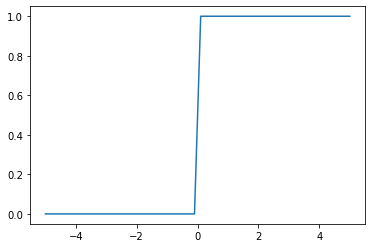

In [23]:
def step_function(x):
    return np.where(x<=0, 0, 1)

x = np.linspace(-5, 5)
y = step_function(x)

plt.plot(x, y)
plt.show()

In [24]:
# 장점 : 뉴런의 흥분 상태를 0과 1로 간단하게 표시 가능
# 단점 : 0과 1의 중간상태를 나타낼 수 없음

### 4.5.2 시그모이드 함수

In [25]:
# 함수의 입력값 x가 작을수록 출력값 y는 0에 가까워지고
# x가 커지면 y는 1에 가까워짐

In [26]:
# y = 1 / 1 + exp(-1)

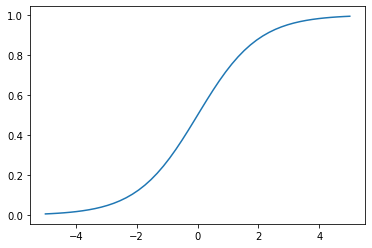

In [29]:
def sigmoid_function(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-5, 5)
y = sigmoid_function(x)

plt.plot(x, y)
plt.show()

In [30]:
# 시그모이드 함수는 계단함수에 비해 매끄럽게 이어지는 곡선
# 0과 1의 중간 상태를 나태낼 수 있음
# 장점 : 미분이 가능함
# 시그모이드 함수의 도함수 y' = (1-y)y 

### 4.5.3 tanh

In [31]:
# tanh : 하이퍼볼릭 탄젠트
# 함수의 입력값 x가 작을수록 출력값 y는 -1에 가까워지고
# x가 커지면 y는 1에 가까워짐

In [32]:
# 시그모이드 함수와 비슷한데, 0을 중심으로 대칭 형태이므로 밸런스가 좋은 활성화 함수

In [33]:
# y = exp(x) - exp(-x) / exp(x) + exp(-x)

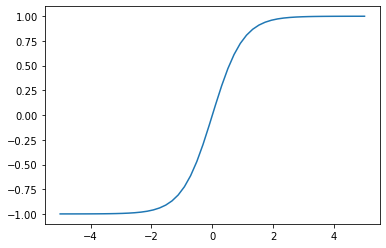

In [34]:
def tanh_function(x):
    return np.tanh(x)

x = np.linspace(-5, 5)
y = tanh_function(x)

plt.plot(x, y)
plt.show()

### 4.5.4 ReLU

In [37]:
# x > 0 인 범위에서 우상향 방향으로 뻗어 올라가는 모양
# 함수의 입력값 x가 음수인 경우 함수의 출력값 y는 0
# x가 양수인 경우 y는 x와 같은 값

In [38]:
# y = { 0 ( x<= 0)}
#     { x ( x > 0)}

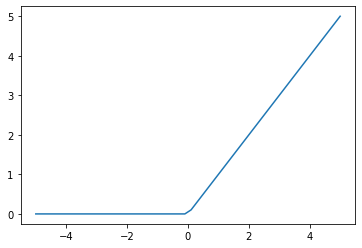

In [41]:
def relu_function(x):
    return np.where( x<= 0 , 0, x)

x = np.linspace(-5, 5)
y = relu_function(x)

plt.plot(x, y)
plt.show()

In [42]:
# 간단하면서도 층의 수가 많아져도 안정적으로 학습할 수 있기 때문에 출력층 이외의 층에서 활성화 함수로 많이 사용됨

In [43]:
# ReLU 도함수 
# y = { 0 (x<=0)}
#     { 1 (x> 0)}
# 미분값이 x에 상관없이 안정적인 값을 얻는 것이 최대 장점

### 4.5.5 Leaky ReLU

In [44]:
# x가 음수인 영역에서 그래프 직선이 조금 기울어져 있는 함수

In [45]:
# y = { 0.01x (x<=0)}
#     { x     (x >0)}

In [46]:
# dying ReLU : ReLU에서 출력이 0이되어 더이상 학습이 진행되지 않는 뉴런이 다수 발생하는 현상
# dying ReLU 문제를 피할 수 있음

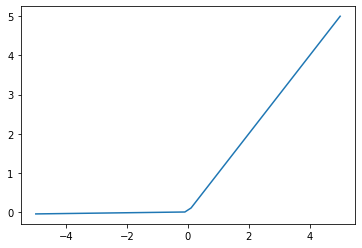

In [47]:
def leaky_relu_function(x):
    return np.where(x <=0, 0.01*x, x)

x = np.linspace(-5, 5)
y = leaky_relu_function(x)

plt.plot(x, y)
plt.show()

### 4.5.6 항등 함수

In [49]:
# 입력값이 그대로 출력값으로 반환되는 함수

In [50]:
# y = x

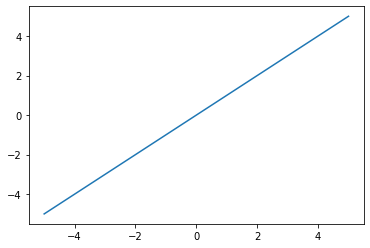

In [51]:
x = np.linspace(-5, 5)
y = x

plt.plot(x, y)
plt. show()

In [52]:
# 회귀 문제를 다룰 때 많이 사용됨
# -> 항등 함수는 출력범위에 제한이 없고 연속적이기 때문에

### 4.5.7 소프트맥스 함수

In [53]:
# 분류문제를 다룰 때 적합

In [54]:
# y = exp(x) / 시그마(k=1, n) exp(xk)

In [55]:
# 같은 층의 모든 활성화 함수의 출력값을 더하면 1
# 한 층에 여러 개의 뉴런이 있고 각 뉴런에서 활성화함수를 통과한 값은 0 ~1 사이
# -> 분류문제에서 각 뉴런이 특정한 범주로 분류될 확률을 나타낼 때 사용

In [56]:
def softmax_function(x):
    return np.exp(x)/np.sum(np.exp(x))

y = softmax_function(np.array([1,2,3]))
print(y)

[0.09003057 0.24472847 0.66524096]


## 4.6 신경망 구현

In [57]:
# 보통 딥러닝 학습시, 처음에는 가중치와 편향을 임의로 설정하고 학습하는 과정에서 변화시킴

### 4.6.1 단일 뉴런 구현

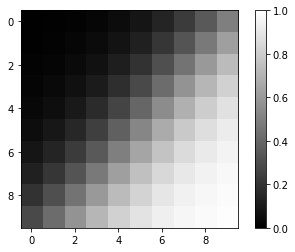

In [61]:
# -1 ~ 1까지 0.2 간격으로 각 10개의 값을 넘파이 배열로 저장
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

# 출력값을 저장할 10*10 그리드
Z = np.zeros((10,10)) 

# x, y값의 입력 가중치
w_x = 2.5
w_y = 3.0

# 편향
bias = 0.1

# 그리드맵의 각 그리드별 뉴런의 연산
for i in range(10):
    for j in range(10):
        
        # 입력과 가중치 곱의 합 + 편향
        u = X[i]*w_x + Y[j]*w_y + bias
        
        # 그리드맵에 출력값 저장
        y = 1/(1+np.exp(-u))   # 시그모이드 함수
        Z[i][j] = y
        
# 그리드맵 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

In [62]:
# 10개의 x값과 10개의 y값 한 쌍마다 출력값이 회색조로 표시
# 검은색 출력값이 0 = 뉴런이 흥분하지 않은 상태
# 희색 출력값이 1 = 뉴런이 흥분한 상태

In [63]:
# 왼쪽위의 검은색 영역 = 출력값이 0에 가까운 영역
# 오른쪽 아래의 흰색 영역 = 출력값이 1에 가까운 영역
# -> 활성화 함수를 시그모이드 함수로 사용했기 때문에 0과 1 사이를 표현하는 이유로 나타나는 현상

### 4.6.2 가중치와 편향의 영향

####  - 가중치에 따라

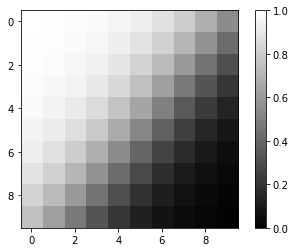

In [64]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)
Z = np.zeros((10,10)) 
# x, y값의 입력 가중치
w_x = -2.5
w_y = -3.0
# 편향
bias = 0.1
for i in range(10):
    for j in range(10):
        u = X[i]*w_x + Y[j]*w_y + bias
        y = 1/(1+np.exp(-u))
        Z[i][j] = y
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

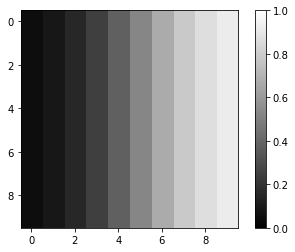

In [65]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)
Z = np.zeros((10,10)) 
# x, y값의 입력 가중치
w_x = 0
w_y = 3.0
# 편향
bias = 0.1
for i in range(10):
    for j in range(10):
        u = X[i]*w_x + Y[j]*w_y + bias
        y = 1/(1+np.exp(-u))
        Z[i][j] = y
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

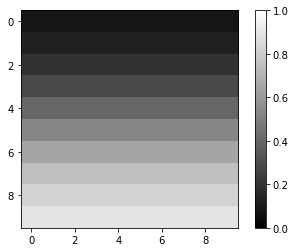

In [66]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)
Z = np.zeros((10,10)) 
# x, y값의 입력 가중치
w_x = 2.5
w_y = 0
# 편향
bias = 0.1
for i in range(10):
    for j in range(10):
        u = X[i]*w_x + Y[j]*w_y + bias
        y = 1/(1+np.exp(-u))
        Z[i][j] = y
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

In [67]:
# 가중치에 따라 뉴런의 흥분조건을 반전시키기도 가능
# x 값의 입력 가중치를 0으로 설정한 결과로, 뉴런의 흥분상태가 y값에 의해서만 달라짐

####  - 편향에 따라

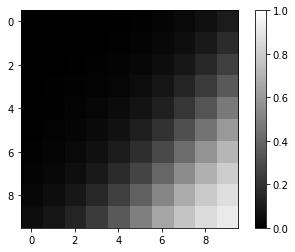

In [2]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)
Z = np.zeros((10,10)) 
# x, y값의 입력 가중치
w_x = 2.5
w_y = 3.0
# 편향
bias = -2.0
for i in range(10):
    for j in range(10):
        u = X[i]*w_x + Y[j]*w_y + bias
        y = 1/(1+np.exp(-u))
        Z[i][j] = y
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

In [ ]:
# 아래 그리드맵에 비해 검은색 영역이 넓어 뉴런이 흥분하기 어려운 상태

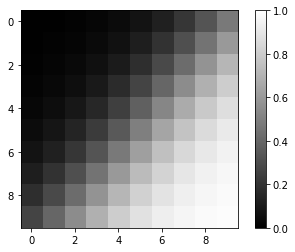

In [3]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)
Z = np.zeros((10,10)) 
# x, y값의 입력 가중치
w_x = 2.5
w_y = 3.0
# 편향
bias = 0.0
for i in range(10):
    for j in range(10):
        u = X[i]*w_x + Y[j]*w_y + bias
        y = 1/(1+np.exp(-u))
        Z[i][j] = y
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

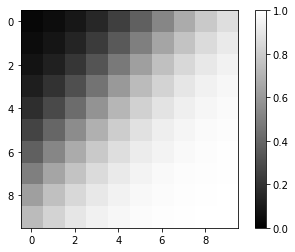

In [4]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)
Z = np.zeros((10,10)) 
# x, y값의 입력 가중치
w_x = 2.5
w_y = 3.0
# 편향
bias = 2.0
for i in range(10):
    for j in range(10):
        u = X[i]*w_x + Y[j]*w_y + bias
        y = 1/(1+np.exp(-u))
        Z[i][j] = y
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

In [5]:
# 위의 그리드 맵보다 흰색영역이 넓어 뉴런이 흥분하기 쉬운 상태

In [6]:
# 편향 값은 뉴런이 흥분하기 쉬운 정도를 결정

### 4.6.3 신경망 구현_회귀

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pypolt as plt

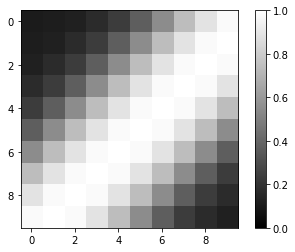

In [9]:
# x, y값
X = np.arange(-1.0, 1.0, 0.2)   # 10개 원소 ( -1부터 1까지 0.2간격씩)
Y = np.arange(-1.0, 1.0, 0.2)

# 출력을 저장하는 10*10 그리드
Z = np.zeros((10, 10))

# 가중치
w_im = np.array([[4.0,4.0],
               [4.0,4.0]])     # 은닉층 2*2 행렬
w_mo = np.array([[1.0],
                [-1.0]])       # 출력층 2*1 행렬

# 입력층의 뉴런 수는 2이고 은닉층의 뉴런 수는 2이므로 은닉층에는 2*2=4개의 가중치 필요
# 은닉층 뉴런 수는 2이고 출력층 유런 수는 1이므로 출력층에는 2*1=2개의 가중치 필요


# 편향
b_im = np.array([3.0,-3.0])   # 은닉층
b_mo = np.array([0.1])        # 출력층

# 편향은 뉴런 수와 일치하므로 은닉층에는 2개, 출력층에는 1개의 편향 필요


# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u))  # 시그모이드 함수

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u                 # 항등함수

# 그리드맵의 각 그리드별 신경망 연산
for i in range(10):
    for j in range(10):
        
        # 순전파
        inp = np.array([X[i], Y[j]])          # 입력층
        mid = middle_layer(inp, w_im, b_im)   # 은닉층
        out = output_layer(mid, w_mo, b_mo)   # 출력층
        
        # 그리드맵에 신경망 출력값 저장
        Z[j][i] = out[0]
        
        # out[0]에 0인 이유 = 출력값을 저장할때 out이 원소 수 1개의 배열이기 때문
        
# 그리드맵으로 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

In [10]:
# 이 신경망은 입력층(뉴런 수 : n=2), 은닉층(n=2), 출력층(n=1)의 3층 구조
# 은닉층의 활성화 함수는 시그모이드 함수
# 출력층의 활성화 함수는 회귀문제에 적합한 항등함수

# 단일 뉴런이였을 때는 흰색과 검은색 영역 두 개로 분할되었지만,
# 다수의 뉴련으로 형성된 이 신경망에서는 흰색이 양쪽 검은색 영역 사이에 끼어 있음

### 4.6.6 신경망의 표현력

In [11]:
# 가중치와 편향을 다양하게 변화시키면 그리드맵에서의 출력 분포가 다양한 형태로 변함
# 여러 개의 뉴런을 네트워크로 연결한 신경망을 구축하면 단일 뉴런에 비해 표현력이 향상됨
# 뉴런과 층의 수가 증가하면 분포가 조금 더 복잡한 출력도 가능
# 복잡한 출력 분포를 이용하면 신경망은 고도의 예측과 분류가 가능

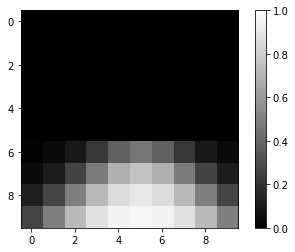

In [12]:
# x, y값
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)
# 출력을 저장하는 10*10 그리드
Z = np.zeros((10, 10))

# 가중치
w_im = np.array([[-5.0,-5.0],
               [5.0,-5.0]]) 
w_mo = np.array([[1.0],
                [-1.0]])

# 편향
b_im = np.array([0.0,0.0])
b_mo = np.array([0.0])

# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u))  # 시그모이드 함수

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u                 # 항등함수
# 그리드맵의 각 그리드별 신경망 연산
for i in range(10):
    for j in range(10):
        # 순전파
        inp = np.array([X[i], Y[j]])          # 입력층
        mid = middle_layer(inp, w_im, b_im)   # 은닉층
        out = output_layer(mid, w_mo, b_mo)   # 출력층
        # 그리드맵에 신경망 출력값 저장
        Z[j][i] = out[0]
# 그리드맵으로 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

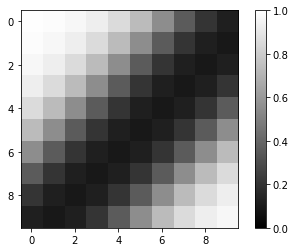

In [13]:
# x, y값
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)
# 출력을 저장하는 10*10 그리드
Z = np.zeros((10, 10))

# 가중치
w_im = np.array([[4.0,4.0],
               [4.0,4.0]]) 
w_mo = np.array([[-1.0],
                [1.0]])

# 편향
b_im = np.array([3.0,-3.0])
b_mo = np.array([1.0])

# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u))  # 시그모이드 함수

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u                 # 항등함수
# 그리드맵의 각 그리드별 신경망 연산
for i in range(10):
    for j in range(10):
        # 순전파
        inp = np.array([X[i], Y[j]])          # 입력층
        mid = middle_layer(inp, w_im, b_im)   # 은닉층
        out = output_layer(mid, w_mo, b_mo)   # 출력층
        # 그리드맵에 신경망 출력값 저장
        Z[j][i] = out[0]
# 그리드맵으로 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

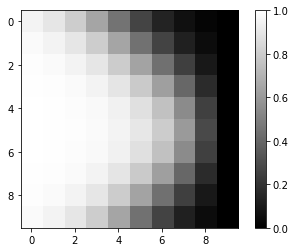

In [14]:
# x, y값
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)
# 출력을 저장하는 10*10 그리드
Z = np.zeros((10, 10))

# 가중치
w_im = np.array([[-4.0,4.0],
               [-4.0,-4.0]]) 
w_mo = np.array([[1.0],
                [-1.0]])

# 편향
b_im = np.array([3.0,-3.0])
b_mo = np.array([0.0])

# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u))  # 시그모이드 함수

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u                 # 항등함수
# 그리드맵의 각 그리드별 신경망 연산
for i in range(10):
    for j in range(10):
        # 순전파
        inp = np.array([X[i], Y[j]])          # 입력층
        mid = middle_layer(inp, w_im, b_im)   # 은닉층
        out = output_layer(mid, w_mo, b_mo)   # 출력층
        # 그리드맵에 신경망 출력값 저장
        Z[j][i] = out[0]
# 그리드맵으로 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

### 4.6.7 신경망 구현_분류

In [15]:
# 층의 개수, 입력층, 은닉층은 회귀 문제와 모두 같으나 출력층의 뉴런이 2개라는 점이 다르다.
# 출력층의 활성화 함수는 소프트맥스 함수 사용

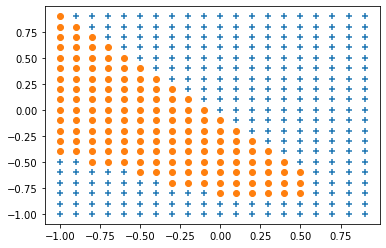

In [16]:
# x, y값
X = np.arange(-1.0, 1.0, 0.1)      # 20개 원소 ( -1부터 1까지 0.2간격씩)
Y = np.arange(-1.0, 1.0, 0.1)

# 가중치
w_im = np.array([[1.0,2.0],
               [2.0,3.0]])         # 은닉층 2*2 행렬
w_mo = np.array([[-1.0,1.0],
                [1.0,-1.0]])       # 출력층 2*2 행렬

# 입력층의 뉴런 수는 2이고 은닉층의 뉴런 수는 2이므로 은닉층에는 2*2=4개의 가중치 필요
# 은닉층 뉴런 수는 2이고 출력층 유런 수는 2이므로 출력층에는 2*2=4개의 가중치 필요


# 편향
b_im = np.array([0.3,-0.3])        # 은닉층
b_mo = np.array([0.4,0.1])         # 출력층

# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u))                  # 시그모이드 함수

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u)/np.sum(np.exp(u))       # 소프트맥스 함수

# 분류 결과를 저장하는 리스트
x_1 = []
y_1 = []
x_2 = []
y_2 = []

# 그리드맵의 각 그리드별 신경망 연산
for i in range(20):
    for j in range(20):
        
        # 순전파
        inp = np.array([X[i], Y[j]])          # 입력층
        mid = middle_layer(inp, w_im, b_im)   # 은닉층
        out = output_layer(mid, w_mo, b_mo)   # 출력층
        
        # 확률의 크기를 비교해 분류함
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])
            
# 산포도 표시
plt.scatter(x_1, y_1, marker="+")
plt.scatter(x_2, y_2, marker="o")
plt.show()

In [17]:
# 회귀와 달리 결과값이 연속적이지 않고 경계가 명확히 구분됨
# 분류에서도 신경망의 표현력을 확인할 수 있음(가중치값과 편향을 바꿔가면서)
# 층을 더 쌓으면 표현력이 향상됨